##### Sumber Data : https://www.kaggle.com/CooperUnion/anime-recommendations-database

**Pendahuluan** :

Topik pada proyek ini adalah Sistem Rekomendasi Anime dengan dataset yang berisi informasi tentang data preferensi pengguna dari 73.516 pengguna di 12.294 anime di *myanimelist.net*. Proyek ini dibuat untuk Submission 2 - Kelas Machine Learning Terapan di Dicoding.

## Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

from google.colab import files

# Kaggle setup

In [ ]:
# Install kaggle
!pip install -q kaggle

In [ ]:
# Unggah file json yang diunduh dari akun kaggle
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# Buat direktori kaggle dan pindahkan file yang diunggah ke folder baru
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

# Izin baca agar dapat diakses di Google Colab
!chmod 600 /root/.kaggle/kaggle.json

## Mengunduh dan Menyiapkan Dataset

![image](https://user-images.githubusercontent.com/87566521/139109868-1ef63ec2-d447-468a-926c-18691e8bd070.png)

####**Informasi Dataset :**

Jenis | Informasi
--- | ---
Sumber | [Kaggle Dataset : Anime Recommendations Database](https://www.kaggle.com/CooperUnion/anime-recommendations-database)
Lisensi | CC0: Public Domain
Kategori | Anime, Manga
Rating Pengunaan | 8.2 (Gold)
Jenis dan Ukuran Berkas | CSV (112 MB)

In [ ]:
# Unduh dataset yang akan digunakan
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 68% 17.0M/25.0M [00:00<00:00, 50.7MB/s]
100% 25.0M/25.0M [00:00<00:00, 63.4MB/s]


In [ ]:
# Mengekstrak berkas zip ke direktori
!unzip -q /content/anime-recommendations-database.zip -d .

## Univariate Exploratory Data Analysis

In [ ]:
# Memuat data pada sebuah dataframe menggunakan pandas
df_anime = pd.read_csv('/content/anime.csv')
df_rating = pd.read_csv('/content/rating.csv')

In [ ]:
print ('Bentuk data (baris, kolom):'+ str(df_anime.shape))
print ('Bentuk data (baris, kolom):'+ str(df_rating.shape))

Bentuk data (baris, kolom):(12294, 7)
Bentuk data (baris, kolom):(7813737, 3)


#### **Informasi Kolom pada Dataset :**
> Dataset ini memiliki 2 file csv yaitu Anime.csv dan Rating.csv. Berikut penjelasannya :

**Anime.csv** 

Kolom | Keterangan
--- | ---
anime_id | ID unik yang mengidentifikasi anime
name | Judul anime
genre | Daftar genre pada anime yang dipisahkan dengan tanda koma
type | movie, TV, OVA, dll
episodes | Jumlah episode (1 jika movie)
rating | Rating rata-rata dari 10 untuk anime
member | Jumlah anggota komunitas yang ada di anime

**Rating.csv** 

Kolom | Keterangan
--- | ---
user_id | ID pengguna yang dibuat secara acak tidak dapat diidentifikasi
anime_id | Anime yang telah diberi peringkat oleh pengguna
rating | Rating dari 10 yang telah diberikan pengguna (-1 jika pengguna menontonnya tetapi tidak memberikan peringkat)

> *Catatan : kolom rating pada file Anime.csv adalah rating yang berasal dari ulasan pada situs web, dan kolom rating pada file Rating.csv adalah rating yang berasal dari ID pengguna.*



##### Variabel Anime

In [ ]:
df_anime.head(11)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [ ]:
# Memuat informasi dataframe
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Berdasarkan output di atas, dapat diketahui bahwa file Anime.csv memiliki 12294 entri.

In [ ]:
# Memuat deskripsi setiap kolom dataframe
df_anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


Dari output di atas, dapat disimpulkan bahwa nilai maksimum rating adalah 10 dan nilai minimumnya adalah 1.027 (1). Artinya, skala rating berkisar antara 1 hingga 10.

In [ ]:
# Melihat jumlah data kosong pada setiap kolom
df_anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [ ]:
#Drop data yang kosong pada setiap kolom
df_anime = df_anime.dropna(axis=0)
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [ ]:
# mengubah tipe data pada kolom rating menjadi integer untuk menyamakan dengan kolom rating pada file Rating.csv
df_anime['rating'] = df_anime['rating'].astype(int)
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  12017 non-null  int64 
 1   name      12017 non-null  object
 2   genre     12017 non-null  object
 3   type      12017 non-null  object
 4   episodes  12017 non-null  object
 5   rating    12017 non-null  int64 
 6   members   12017 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 751.1+ KB


In [ ]:
print('Total jumlah ID Anime :', len(df_anime['anime_id'].unique()))
print('Total jumlah Genre :', len(df_anime['genre'].unique()))
print('Total jumlah Judul Anime :', len(df_anime['name'].unique()))
print('Total jumlah Rating :', len(df_anime['rating'].unique()))

Total jumlah ID Anime : 12017
Total jumlah Genre : 3229
Total jumlah Judul Anime : 12015
Total jumlah Rating : 10


##### Variabel Rating

In [ ]:
df_rating.head(11)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [ ]:
# Memuat informasi dataframe
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


Berdasarkan output di atas, dapat diketahui bahwa file Rating.csv memiliki 7813737 entri.

In [ ]:
# Memuat deskripsi setiap kolom dataframe
df_rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [ ]:
print('Total jumlah user :', len(df_rating['user_id'].unique()))
print('Total jumlah judul anime :', len(df_rating['anime_id'].unique()))
print('Total jumlah rating :', len(df_rating['rating'].unique()))

Total jumlah user : 73515
Total jumlah judul anime : 11200
Total jumlah rating : 11


## Data Preprocessing

In [ ]:
# Merge dataframe df_rating dan df_anime
anime_new = pd.merge(df_anime, df_rating, on='anime_id', suffixes=['', 'user'])
anime_new

,anime_id,name,genre,type,episodes,rating,members,user_id,ratinguser
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4,175,39532,-1
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4,175,48766,-1
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4,175,60365,4
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5,142,27364,-1


In [ ]:
# Ganti nama kolom agar dapat lebih mudah dipahami
anime_new = anime_new.rename(columns={'name' : 'title', 'ratinguser':'rating_user'})
anime_new.head(11)

,anime_id,title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,278,-1
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,548,10


## Data Preparation

Pada data preparation, saya akan memeriksa rating dengan nilai -1 yang kemudian akan dianggap sebagai outlier dan akan diubah menjadi NaN lalu akan saya bersihkan.

In [ ]:
anime_fix=anime_new.copy()
anime_fix["rating_user"].replace({-1: np.nan}, inplace=True)
anime_fix

,anime_id,title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,99,5.0
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,152,10.0
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,244,10.0
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,271,10.0
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,278,NaN
...,...,...,...,...,...,...,...,...,...
7813606,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4,175,39532,NaN
7813607,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4,175,48766,NaN
7813608,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4,175,60365,4.0
7813609,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5,142,27364,NaN


In [ ]:
# Melihat jumlah data kosong
anime_fix.isnull().sum()

anime_id             0
title                0
genre                0
type                 0
episodes             0
rating               0
members              0
user_id              0
rating_user    1476465
dtype: int64

In [ ]:
# Drop data yang kosong
anime_fix = anime_fix.dropna(axis = 0, how ='any') 
anime_fix.isnull().sum()

anime_id       0
title          0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

In [ ]:
# Membuat variabel fix_anime yang berisi dataframe anime_fix kemudian mengurutkan berdasarkan anime_id
fix_anime = anime_fix
fix_anime.sort_values('anime_id')

,anime_id,title,genre,type,episodes,rating,members,user_id,rating_user
202611,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8,486824,21571,9.0
203372,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8,486824,24927,10.0
203371,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8,486824,24919,9.0
203370,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8,486824,24906,7.0
203369,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8,486824,24895,10.0
...,...,...,...,...,...,...,...,...,...
7607729,34367,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports",Special,1,5,582,30565,6.0
7607733,34367,Long Riders Recap,"Comedy, Shounen, Slice of Life, Sports",Special,1,5,582,62402,4.0
7287741,34475,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6,313,13954,6.0
7287743,34475,Monster Strike: Rain of Memories,"Action, Fantasy, Game",ONA,1,6,313,70547,9.0


Saya hanya akan menggunakan data unik untuk dimasukkan ke dalam proses pemodelan. Oleh karena itu, data yang duplikat akan saya hapus dengan fungsi drop_duplicates(). Dalam hal ini, saya membuang data duplikat pada kolom ‘anime_id’.

In [ ]:
# Membuang data duplikat pada variabel fix_anime
fix_anime = fix_anime.drop_duplicates('anime_id')
fix_anime

,anime_id,title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,99,5.0
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665,3,10.0
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262,43,10.0
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572,5,9.0
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266,5,9.0
...,...,...,...,...,...,...,...,...,...
7813590,5541,The Satisfaction,Hentai,OVA,1,4,166,37351,1.0
7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4,211,20171,7.0
7813600,5543,Under World,Hentai,OVA,1,4,183,49503,4.0
7813604,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4,219,49503,6.0


Setelah menghapus data duplikat, jumlah data saat ini adalah 9892 baris dan 9 kolom. Selanjutnya saya akan membuat visualisasi data agar dapat dipahami dengan lebih mudah.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


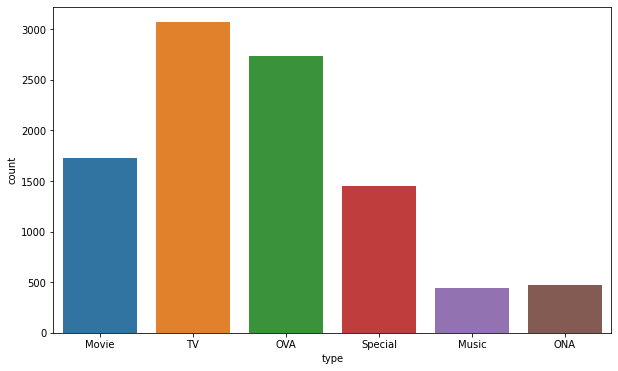

In [ ]:
# Visualisasi untuk kolom type
plt.figure(figsize=(10,6))
sns.countplot(fix_anime.type)

Dari hasil visualisasi di atas, dapat disimpulkan bahwa anime ditayangkan lebih banyak di TV dan di OVA.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


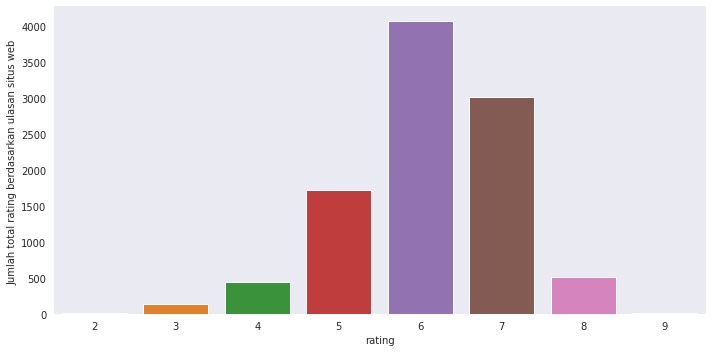

In [ ]:
# Visualisasi untuk rating berdasarkan ulasan situs web
with sns.axes_style('dark'):
    g = sns.catplot('rating', data=fix_anime, aspect=2.0, kind='count')
    g.set_ylabels('Jumlah total rating berdasarkan ulasan situs web ')

Dari hasil visualisasi di atas, dapat disimpulkan bahwa rata-rata rating melalui ulasan website adalah kebanyakan diantara 6 dan 7.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


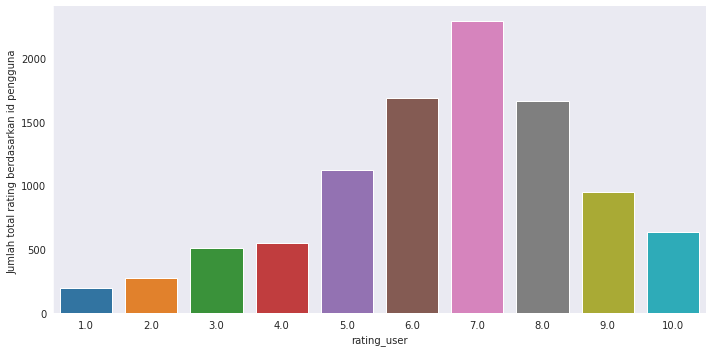

In [ ]:
# Visualisasi untuk rating berdasarkan ID pengguna
with sns.axes_style('dark'):
    g = sns.catplot('rating_user', data=fix_anime, aspect=2.0, kind='count')
    g.set_ylabels('Jumlah total rating berdasarkan id pengguna ')

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa rating berdasarkan ID Pengguna paling banyak adalah 7 dan diikuti dengan 6 dan 8.

Selanjutnya, saya akan menampilkan genre mana saja yang paling sering muncul dengan menggunakan word clouds plot.

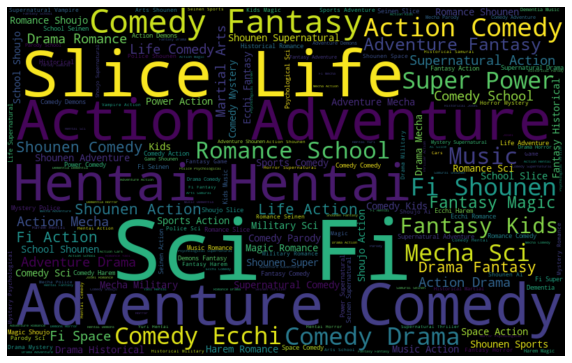

In [ ]:
from wordcloud import WordCloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='black', random_state=21, max_font_size=120).generate(words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')
 
all_words = ' '.join([text for text in fix_anime['genre']])
wordCloud(all_words)

Berdasarkan plot yang telah dibuat, dapat dilihat bahwa genre yang paling sering muncul adalah Sci Fi, Comedy, Adventure, Slice Life, dan Action.

Selanjutnya, saya akan melakukan konversi data series menjadi list. Dalam hal ini, saya menggunakan fungsi tolist() dari library numpy. Lalu saya akan melakukan persiapan data untuk menyandikan (encode) kolom ‘user_id’ dan ‘anime_id’ ke dalam indeks integer.

In [ ]:
# Mengubah user_id menjadi list
user_id = fix_anime['user_id'].unique().tolist()
print('list user_id: ', user_id)
 
# Encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_id)}
print('encoded user_id : ', user_to_user_encoded)
 
# Encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_id)}

print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [99, 3, 43, 5, 17, 7, 183, 2378, 46, 11, 19, 14, 21, 233, 2695, 1551, 152, 308, 1954, 82, 123, 235, 51, 38, 12, 39, 373, 160, 1591, 247, 2, 98, 341, 244, 139, 148, 50, 109, 52, 33, 74, 40, 75, 234, 27, 37, 93, 77, 250, 31, 294, 45, 2589, 61, 65, 276, 129, 370, 25, 125, 3615, 96, 68, 475, 159, 24, 382, 48, 1145, 339, 298, 428, 861, 439, 478, 18, 29, 1116, 392, 128, 1237, 511, 226, 210, 85, 720, 44, 271, 1798, 1060, 66, 171, 771, 191, 2632, 248, 23, 385, 73, 55, 57, 269, 644, 562, 885, 2819, 167, 395, 63076, 165, 95, 324, 169, 127, 1019, 1447, 217, 1497, 120, 418, 847, 3360, 87, 47, 1679, 108, 352, 784, 1396, 79, 80, 3254, 1835, 1924, 196, 135, 1400, 342, 317, 104, 661, 572, 21180, 288, 1822, 659, 567, 10194, 634, 2527, 533, 154, 94, 640, 346, 134, 225, 682, 163, 1, 15455, 277, 290, 1960, 775, 280, 1530, 954, 190, 256, 350, 192, 516, 62, 446, 81, 3269, 1549, 1426, 118, 565, 8, 189, 64, 321, 1378, 5419, 111, 1043, 164, 436, 107, 36, 591, 820, 438, 97, 1677, 1344, 4339, 540,

In [ ]:
# Mengubah anime_id menjadi list
anime_id = fix_anime['anime_id'].unique().tolist()
 
# Encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_id)}
 
# Encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_id)}

print('encoded angka ke anime_id: ', anime_encoded_to_anime)

encoded angka ke anime_id:  {0: 32281, 1: 5114, 2: 28977, 3: 9253, 4: 9969, 5: 32935, 6: 11061, 7: 820, 8: 15335, 9: 15417, 10: 4181, 11: 28851, 12: 918, 13: 2904, 14: 28891, 15: 199, 16: 23273, 17: 24701, 18: 12355, 19: 1575, 20: 263, 21: 44, 22: 1, 23: 30276, 24: 164, 25: 7311, 26: 17074, 27: 21939, 28: 457, 29: 2001, 30: 245, 31: 5258, 32: 28957, 33: 11665, 34: 431, 35: 11741, 36: 31757, 37: 19, 38: 12365, 39: 1535, 40: 32366, 41: 30654, 42: 20583, 43: 19647, 44: 4282, 45: 10379, 46: 22135, 47: 21329, 48: 31043, 49: 7785, 50: 3297, 51: 30709, 52: 6114, 53: 31240, 54: 4565, 55: 5300, 56: 9989, 57: 24415, 58: 11577, 59: 10408, 60: 28171, 61: 21899, 62: 26055, 63: 7472, 64: 777, 65: 22535, 66: 28735, 67: 12431, 68: 28805, 69: 578, 70: 16894, 71: 5028, 72: 801, 73: 5205, 74: 17389, 75: 170, 76: 10162, 77: 18617, 78: 32182, 79: 877, 80: 2251, 81: 24687, 82: 16498, 83: 10030, 84: 5941, 85: 30346, 86: 3784, 87: 13125, 88: 12029, 89: 14397, 90: 10087, 91: 14719, 92: 9756, 93: 10165, 94: 136

# Model Development

Untuk tahap modeling, saya akan menggunakan Neural Network dan Cosine Simirality untuk sistem rekomendasi berbasis Collaborative Filtering dan Content-Based Filtering.

Model Deep Learning akan saya gunakan untuk Sistem Rekomendasi berbasis Collaborative Filtering yang mana model ini akan menghasilkan rekomendasi untuk satu pengguna.

Cosine Similarity akan saya gunakan untuk Sistem Rekomendasi berbasis Content-Based Filtering yang akan menghitung kemiripan antara satu film dengan lainnya berdasarkan fitur yang terdapat pada satu film.

##### Content Based Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(fix_anime['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names()

['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(fix_anime['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(9892, 47)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.15439041, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15439041, 1.        , 0.17128271, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17128271, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa judul anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=fix_anime['title'],
                             columns=fix_anime['title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix tiap anime
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9892, 9892)


title,Koukaku no Pandora,Juubee Ninpuuchou: Ryuuhougyoku-hen,Kaitou Saint Tail,Hyakka Ryouran: Samurai After Specials,Choboraunyopomi Gekijou Ai Mai Mii,Solty Rei,Kana Kana Kazoku: Stop Rubella,Kusatta Kyoushi no Houteishiki,Tondemo Nezumi Daikatsuyaku,Inukami!
title,,,,,,,,,,
Shownoid Mako-chan,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Peeping Life TV: Season 1??,0.102739,0.000000,0.000000,0.0,1.000000,0.000000,0.323208,0.089242,0.00000,0.093104
Zoku Natsume Yuujinchou,0.000000,0.129064,0.256967,0.0,0.632393,0.000000,0.000000,0.000000,0.00000,0.193736
Hakken Taiken Daisuki! Shimajirou,0.094292,0.300494,0.464445,0.0,0.095875,0.000000,0.296634,0.081904,0.39562,0.085450
Nebula feat. Hatsune Miku,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Attack No.1: Namida no Kaiten Receive,0.000000,0.000000,0.351072,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Kunoichi Sakuya,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Injuu Kyoushi,0.000000,0.266527,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Elfen Lied,0.094616,0.313496,0.138688,0.0,0.000000,0.078775,0.000000,0.129105,0.00000,0.307850



    Rekomendasi Anime berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    title : tipe data string (str)
                Judul Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan genre sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).


In [ ]:
def anime_recommendations(anime_title, similarity_data=cosine_sim_df, 
                         items=fix_anime[['title','genre','type','rating']], k=10):
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)

    index = similarity_data.loc[:, anime_title].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop anime_title agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(anime_title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selanjutnya, saya akan menerapkan kode di atas untuk menemukan rekomendasi Anime yang mirip dengan Boruto: Naruto the Movie.

In [ ]:
fix_anime[fix_anime.title.eq('Boruto: Naruto the Movie')]

,anime_id,title,genre,type,episodes,rating,members,user_id,rating_user
2309483,28755,Boruto: Naruto the Movie,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,1,8,74690,210,9.0


Berdasarkan output di atas, dapat dilihat bahwa Anime dengan judul Boruto: Naruto the Movie memiliki genre Action, Comedy, Martial Arts, Shounen, dan Super Power. Rekomendasi yang diharapkan adalah Anime dengan genre yang sama.

In [ ]:
# Mendapatkan rekomendasi anime yang mirip dengan Boruto: Naruto the Movie
anime_recommendations('Boruto: Naruto the Movie')

,title,genre,type,rating
0,Naruto Shippuuden: Sunny Side Battle,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,7
1,Naruto: Shippuuden Movie 4 - The Lost Tower,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,7
2,Naruto x UT,"Action, Comedy, Martial Arts, Shounen, Super P...",OVA,7
3,Naruto Soyokazeden Movie: Naruto to Mashin to ...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,7
4,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,7
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,"Action, Comedy, Martial Arts, Shounen, Super P...",Movie,7
6,Boruto: Naruto the Movie - Naruto ga Hokage ni...,"Action, Comedy, Martial Arts, Shounen, Super P...",Special,7
7,Kyutai Panic Adventure!,"Action, Martial Arts, Shounen, Super Power",Special,5
8,Rekka no Honoo,"Action, Adventure, Martial Arts, Shounen, Supe...",TV,7
9,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,"Action, Adventure, Martial Arts, Shounen, Supe...",Movie,7


Model berhasil memberikan rekomendasi 10 judul Anime dengan Genre yang sama seperti yang diharapkan, yaitu Action, Comedy, Martial Arts, Shounen, dan Super Power.

##### Collaborative Filtering

In [ ]:
fix_anime.head()

,anime_id,title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9,200630,99,5.0
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9,793665,3,10.0
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,114262,43,10.0
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9,673572,5,9.0
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9,151266,5,9.0


In [ ]:
# Drop kolom yang tidak digunakan
df_anime = fix_anime.drop(columns=['rating'])
df_anime

,anime_id,title,genre,type,episodes,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,99,5.0
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,793665,3,10.0
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,114262,43,10.0
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,673572,5,9.0
47442,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,151266,5,9.0
...,...,...,...,...,...,...,...,...
7813590,5541,The Satisfaction,Hentai,OVA,1,166,37351,1.0
7813594,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,211,20171,7.0
7813600,5543,Under World,Hentai,OVA,1,183,49503,4.0
7813604,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,219,49503,6.0


In [ ]:
# Mapping user_id ke dataframe user
df_anime['user'] = df_anime['user_id'].map(user_to_user_encoded)
 
# Mapping anime_id ke dataframe anime
df_anime['anime'] = df_anime['anime_id'].map(anime_to_anime_encoded)

In [ ]:
# Cek jumlah user, anime, dan mengubah nilai rating menjadi float.

# Mendapatkan jumlah user
num_user = len(user_to_user_encoded)
 
# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
 
# Mengubah rating menjadi nilai float
df_anime['rating_user'] = df_anime['rating_user'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df_anime['rating_user'])
 
# Nilai maksimal rating
max_rating = max(df_anime['rating_user'])
 
print('Jumlah User: {}, Jumlah anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_user, num_anime, min_rating, max_rating
))

Jumlah User: 1728, Jumlah anime: 9892, Min Rating: 1.0, Max Rating: 10.0


Saya akan membagi data untuk training dan validasi dengan komposisi 80:20. Namun sebelumnya, saya akan mengacak datanya terlebih dahulu agar distribusinya menjadi random.

In [ ]:
# Mengacak dataset
df_anime = df_anime.sample(frac=1, random_state=42)
df_anime

,anime_id,title,genre,type,episodes,members,user_id,rating_user,user,anime
4693141,1852,Hidamari Sketch,"Comedy, School, Slice of Life",TV,12,42998,17,7.0,4,1496
7514137,13789,Little Nemo Pilot,Adventure,Special,1,407,22681,6.0,1142,5950
5405133,21863,Mangaka-san to Assistant-san to The Animation,"Comedy, Ecchi, Harem, Seinen, Slice of Life",TV,12,108642,5,6.0,3,2012
7524603,2690,Urban Square: Kouhaku no Tsuigeki,"Action, Mystery, Seinen",OVA,1,656,7527,7.0,361,6000
7645755,19337,Momoya x Peeping Life: Go en Desu yo!,Slice of Life,ONA,4,218,19317,1.0,1176,7006
...,...,...,...,...,...,...,...,...,...,...
7472175,5369,Street Fighter: Aratanaru Kizuna,"Action, Adventure, Shounen",OVA,1,5106,572,2.0,141,5734
7350959,14889,Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu OVA,"Comedy, Ecchi, Parody, School, Shounen",OVA,1,3456,21,7.0,12,5191
7402971,647,Harukanaru Toki no Naka de: Ajisai Yumegatari,"Adventure, Demons, Drama, Fantasy, Historical,...",OVA,2,2253,436,6.0,190,5390
3395298,9000,Toaru Hikuushi e no Tsuioku,"Adventure, Military, Romance",Movie,1,28857,120,8.0,118,860


Saya akan memetakan (mapping) data user dan anime menjadi satu value terlebih dahulu. Kemudian membuat rating dalam skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [ ]:
# Inisialisasi variable x untuk mencocokkan data user dan anime menjadi satu value
x = df_anime[['user', 'anime']].values
 
# Inisialisasi variable y untuk membuat rating dari hasil 
y = df_anime['rating_user'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Split data dengan komposisi 80% data train dan 20% data validasi
train_indices = int(0.8 * df_anime.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[   4 1496]
 [1142 5950]
 [   3 2012]
 ...
 [ 190 5390]
 [ 118  860]
 [ 484 7270]] [0.66666667 0.55555556 0.55555556 ... 0.55555556 0.77777778 0.11111111]


Saya akan melakukan proses embedding terhadap data user dan anime. Lalu melakukan operasi perkalian dot product antara embedding user dan anime. Selain itu, saya juga menambahkan bias untuk setiap user dan anime. Skor kecocokan ditetapkan dalam skala [0,1] dengan fungsi aktivasi sigmoid.

In [ ]:
# Import library yang akan kita gunakan

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
# inisialisasi model RecommenderNet
model = RecommenderNet(num_user, num_anime, 50)

# compile model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]]
)

Model ini menggunakan Binary Crossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, Mean Absolute Error dan Root Mean Squared Error (RMSE) sebagai metrics evaluation.

In [ ]:
# Menggunakan callback agar pengujian berhenti jika akurasi mencapai target
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=7,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
990/990 [==============================] - 6s 5ms/step - loss: 0.6836 - mean_absolute_error: 0.2054 - root_mean_squared_error: 0.2470 - val_loss: 0.6744 - val_mean_absolute_error: 0.1948 - val_root_mean_squared_error: 0.2370
Epoch 2/100
990/990 [==============================] - 5s 5ms/step - loss: 0.6450 - mean_absolute_error: 0.1622 - root_mean_squared_error: 0.2049 - val_loss: 0.6653 - val_mean_absolute_error: 0.1851 - val_root_mean_squared_error: 0.2272
Epoch 3/100
990/990 [==============================] - 5s 5ms/step - loss: 0.6321 - mean_absolute_error: 0.1472 - root_mean_squared_error: 0.1896 - val_loss: 0.6614 - val_mean_absolute_error: 0.1809 - val_root_mean_squared_error: 0.2228
Epoch 4/100
990/990 [==============================] - 5s 5ms/step - loss: 0.6226 - mean_absolute_error: 0.1364 - root_mean_squared_error: 0.1775 - val_loss: 0.6582 - val_mean_absolute_error: 0.1778 - val_root_mean_squared_error: 0.2192
Epoch 5/100
990/990 [==============================]

Untuk mendapatkan rekomendasi anime, saya akan mengambil sampel user secara acak dan mendefinisikan variabel anime_not_watched yang merupakan daftar anime yang belum pernah ditonton oleh pengguna.

In [ ]:
# Mengambil sample user
user_id = df_anime.user_id.sample(1).iloc[0]
anime_watched_by_user = df_anime[df_anime.user_id == user_id]
 
# Operator bitwise
anime_not_watched = df_anime[~df_anime['anime_id'].isin(anime_watched_by_user.anime_id.values)]['anime_id'] 
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()

# top rating
top_ratings_indices = ratings.argsort()[-10:][::-1]

# rekomendasi anime
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi untuk user: {}'.format(user_id))
print('=' * 9)
print('anime dengan peringkat tinggi dari user')
print('-' * 8)

# mencari rekomendasi anime berdasarkan rating yang diberikan user
top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating_user',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
df_anime_rows = df_anime[df_anime['anime_id'].isin(top_anime_user)]
for row in df_anime_rows.itertuples():
    print(row.title, ':', row.genre)
 
print('-' * 8)
print('10 rekomendasi anime teratas')
print('-' * 8)

# rekomendasi anime
anime_top10 = df_anime[df_anime['anime_id'].isin(recommended_anime_ids)]

# fungsi perulangan untuk menampilkan rekomendasi anime dan genre sebanyak 10 buah
for row in anime_top10.itertuples():
    print(row.title, ':', row.genre)

Menampilkan rekomendasi untuk user: 4643
anime dengan peringkat tinggi dari user
--------
Ran-&gt;Sem: Hakudaku Delmo Tsuma no Miira Tori : Hentai
Seikou!: Osananajimi wa Terekusasou ni Uso wo Tsuku : Hentai
Oyako Rankan The Animation : Hentai
Kuraibito : Hentai
Hitozuma Koukan Nikki : Hentai
--------
10 rekomendasi anime teratas
--------
Oni Chichi: Re-born : Hentai
Mobile Suit Gundam Unicorn : Action, Drama, Mecha, Military, Sci-Fi, Space
Just Awake : Action, Music, Sci-Fi
Precure All Stars Movie New Stage 2: Kokoro no Tomodachi : Action, Kids, Magic, Shoujo
Uchuu no Kishi Tekkaman Blade : Action, Adventure, Drama, Mecha, Military, Romance, Sci-Fi, Shounen, Space
NG Knight Ramune &amp; 40 EX: Biku Biku Triangle Ai no Arashi Daisakusen : Adventure, Comedy, Fantasy, Mecha, Shounen
Patapata Hikousen no Bouken : Adventure, Sci-Fi
Akame ga Kill! Recap : Action, Adventure, Fantasy
Kinnikuman : Adventure, Comedy, Shounen, Sports
Aoki Hagane no Arpeggio: Ars Nova Cadenza : Action, Sci-Fi, Se

Kita telah mendapatkan 10 rekomendasi Anime untuk user dengan id 4643.

# Model Evaluation

Mean Absolute Error (MAE) mengukur besarnya rata-rata kesalahan dalam serangkaian prediksi yang sudah di latih kepada data yang akan dites, tanpa mempertimbangkan arahnya. Semakin rendah nilai MAE (mean absolute error) maka semakin baik dan akurat model yang dibuat.

Berikut rumusnya :

![image](https://user-images.githubusercontent.com/87566521/139152819-30500f63-40a3-40ed-86fd-a62e517adbb4.png)

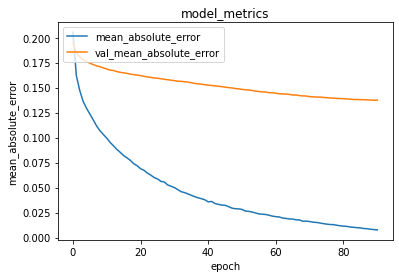

In [ ]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['mean_absolute_error', 'val_mean_absolute_error'], loc='upper left')
plt.show()

Root mean squared error (RMSE) adalah aturan penilaian kuadrat yang juga mengukur besarnya rata-rata kesalahan. Sama seperti MAE, semakin rendahnya nilai root mean square error juga menandakan semakin baik model tersebut dalam melakukan prediksi.

Berikut rumusnya :

![image](https://user-images.githubusercontent.com/87566521/139154262-7eca086f-2007-41e1-9737-5f9fe68a8f49.png)


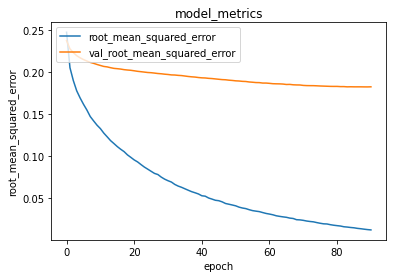

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['root_mean_squared_error', 'val_root_mean_squared_error'], loc='upper left')
plt.show()

Berdasarkan plotting proses training di atas, dapat dilihat bahwa proses training model cukup smooth dan model konvergen pada epochs sekitar 90. Dari hasil model ini, Mean Absolute Error yang didapat adalah 0.0077 pada training dan 0.1375 pada test. Untuk Root Mean Squared Error, diperoleh nilai error akhir sebesar 0.0126 pada tranining dan 0.1823 pada test. Hal ini menunjukan bahwa model ini memiliki error dibawah 20% jika menggunakan MAE dan dibawah 20% jika menggunakan RMSE. 

# Penutup :

Model Sistem rekomendasi Anime telah selesai dibuat dan model ini dapat digunakan untuk untuk merekomendasikan data yang sebenarnya. Berdasarkan model tersebut, dapat diketahui bahwa sistem rekomendasi berbasis Collaborative Filtering dan Content-Based Filtering dapat merekomendasikan anime kepada pengguna seperti yang diharapkan. Namun, beberapa pengembangan lain masih dapat dilakukan untuk membuat model yang memiliki akurasi lebih tinggi.